# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [39]:
# Usado para a leitura do csv
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv.csv", delimiter=',')

# Aqui usado para exibir somente as primeiras 10 linhas do DataFrame, nesse caso só para ter ciência de que tinha encontrado o arquivo correto
df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [40]:
#Seu código aqui para a média
# Agrupando os dados de cada categoria para a extração da média
resultados = dados.groupby('Categoria')['Preco_Normal'].agg(['mean',])
print(resultados)

                                   mean
Categoria                              
belleza-y-cuidado-personal  1783.556485
comidas-preparadas          3095.043478
congelados                  2108.042553
frutas                      1724.473684
instantaneos-y-sopas         765.491228
lacteos                     2385.219239
verduras                    1343.296875


In [41]:
#Seu código aqui para a mediana
# Agrupando os dados de cada categoria para a extração da mediana
resultados = dados.groupby('Categoria')['Preco_Normal'].agg(['median',])
print(resultados)

                            median
Categoria                         
belleza-y-cuidado-personal  1569.0
comidas-preparadas          3290.0
congelados                  1519.0
frutas                      1195.0
instantaneos-y-sopas         439.0
lacteos                      989.0
verduras                    1180.0


Digite aqui as categorias:
Todas elas tem um certo valor acima ou abaixo da mediana mas os que mais se destacam são: lacteos e congelados.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [42]:
#Seu código aqui
# Agrupando os dados para a visualização do desvio padrão de cada categoria
resultados = dados.groupby('Categoria')['Preco_Normal'].agg(['std',]).reset_index()
print(resultados)

                    Categoria          std
0  belleza-y-cuidado-personal  2210.041719
1          comidas-preparadas  2019.911428
2                  congelados  2111.539896
3                      frutas  1639.151114
4        instantaneos-y-sopas  1170.232869
5                     lacteos  3925.816164
6                    verduras  1012.699625


Digite nesse campo o comportamento que você identificou.
O desvio padrão mais alto foi na categoria de lacteos, indicando que os preços dos produtos dessa categoria variam bastante. Isso pode ser explicado porque há produtos simples como frutas e verduras e outros de alto valor como a comida preparada. Já em instantâneos y sopas, os preços são similares, resultando em baixo desvio padrão.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

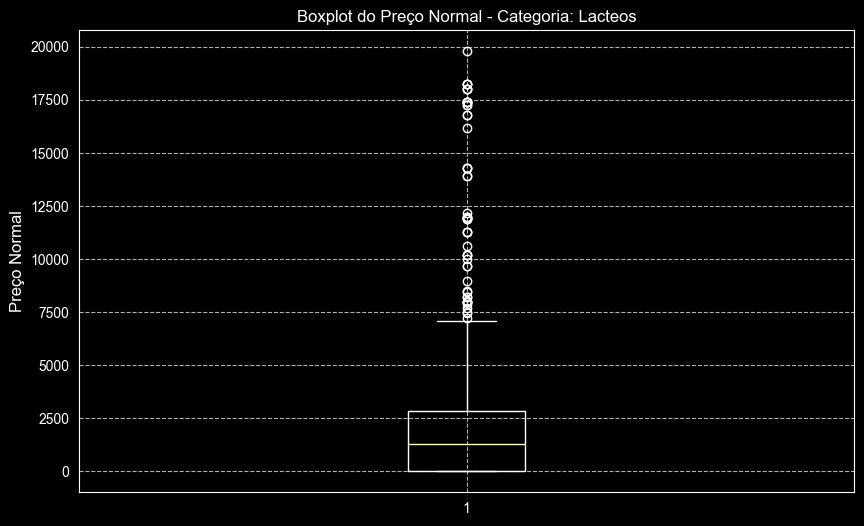

In [43]:
#Seu código aqui
# Usando o matplotlib para a construção do gráfico
# Aqui é para a construção da figura do gráfico sendo: (figsize=(largura, altura)
plt.figure(figsize=(10, 6))

# Aqui usado para pegar uma coluna específica
plt.boxplot(df['Preco_Normal'])

# Aqui para por o titulo e categoria específica
plt.title('Boxplot do Preço Normal - Categoria: Lacteos')

# Aqui para nomear o eixo y com numeração para tamanho da fonte no "frontsize"
plt.ylabel('Preço Normal', fontsize=12)

# Adicionando grades ao gráfico com estilo de linha tracejada (--)
# e com transparência de 70% (alpha=0.7) para melhorar a visualização
plt.grid(True, linestyle='--', alpha=0.7)

# E por fim, usando para plotar o gráfico na tela
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

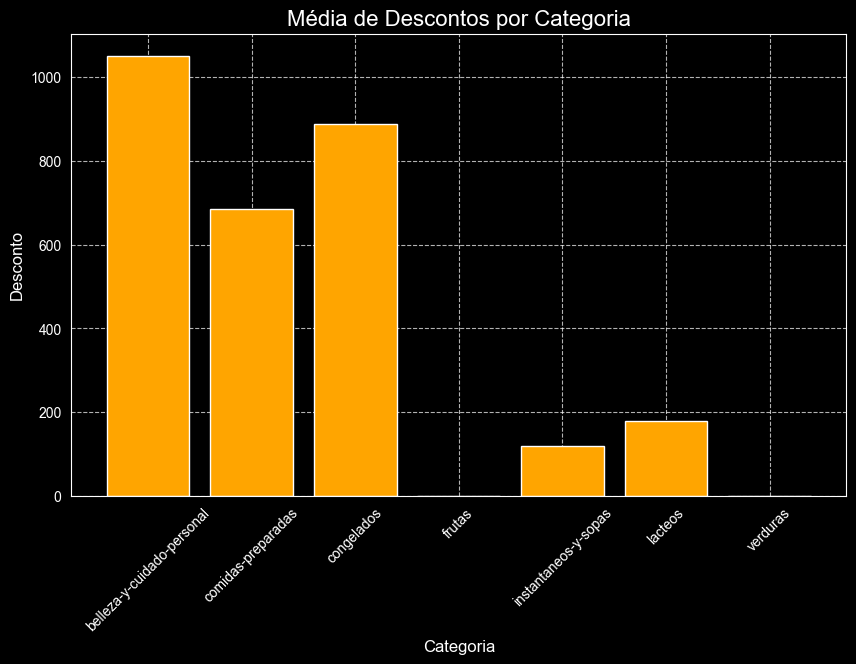

In [44]:
# Seu código aqui
plt.figure(figsize=(10, 6))
# Agrupando os dados do DataFrame por categoria e calculando a média do desconto para cada categoria
desconto_por_categoria = df.groupby('Categoria')['Preco_Desconto'].mean()

# Indicamos aqui os índices do DataFrame no eixo x e os salários no eixo y, vejam que vocês podem realizar a alteração da cor, nesse caso usamos Orange
plt.bar(desconto_por_categoria.index, desconto_por_categoria, color='Orange')

# Aqui adicionamos um título e podemos alterar o tamanho da sua fonte no "fontsize"
plt.title('Média de Descontos por Categoria', fontsize=16)

# Adicionando um rótulo ao eixo x com tamanho de fonte 12
plt.xlabel('Categoria', fontsize=12)

# Adicionando um rótulo ao eixo y com tamanho de fonte 12
plt.ylabel('Desconto', fontsize=12)

# Nessa etapa rotacionamos os rótulos do eixo x em 45 graus para melhorar a legibilidade
plt.xticks(rotation=45)

# Adicionando grades ao gráfico com estilo de linha tracejada (--)
# e com transparência de 70% (alpha=0.7) para melhorar a visualização
plt.grid(True, linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [45]:
# Seu código aqui
# Aqui agrupamos os dados do DataFrame por categoria e marca, e calculando a média do desconto para cada categoria e marca
categoria_por_marca_por_media_desconto = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Criando o gráfico de treemap com os descontos por marca, usando as cores para representar a categoria
fig = px.treemap(categoria_por_marca_por_media_desconto,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Categoria Marca e Média de Desconto',
                 color='Categoria')

# Exibindo o gráfico
fig.show()